In [6]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Palm_Reading/Train_Data'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Palm_Reading/Valid_Data'

In [13]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 12, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 12, class_mode = 'categorical')

Found 34 images belonging to 4 classes.
Found 34 images belonging to 4 classes.


In [14]:
train_dataset.class_indices

{'dinhmenh': 0, 'sinhdao': 1, 'tamdao': 2, 'tridao': 3}

In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(4,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [19]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [20]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
3/3 [==============================] - 21s 5s/step - loss: 1.7611 - accuracy: 0.2059 - val_loss: 1.9550 - val_accuracy: 0.2647
Epoch 2/50
3/3 [==============================] - 1s 254ms/step - loss: 1.8212 - accuracy: 0.1471 - val_loss: 1.3902 - val_accuracy: 0.2647
Epoch 3/50
3/3 [==============================] - 1s 252ms/step - loss: 1.4406 - accuracy: 0.2941 - val_loss: 1.3877 - val_accuracy: 0.3235
Epoch 4/50
3/3 [==============================] - 1s 268ms/step - loss: 1.3790 - accuracy: 0.3235 - val_loss: 1.3548 - val_accuracy: 0.4118
Epoch 5/50
3/3 [==============================] - 1s 250ms/step - loss: 1.4427 - accuracy: 0.2059 - val_loss: 1.3622 - val_accuracy: 0.2647
Epoch 6/50
3/3 [==============================] - 1s 247ms/step - loss: 1.4373 - accuracy: 0.2353 - val_loss: 1.3685 - val_accuracy: 0.3235
Epoch 7/50
3/3 [==============================] - 1s 244ms/step - loss: 1.4812 - accuracy: 0.3235 - val_loss: 1.3640 - val_accuracy: 0.3235
Epoch 8/50
3/3 [======

In [21]:
model.save('/content/drive/MyDrive/Palm_Reading/PalmReading.h5')

In [22]:
palmreading_model = load_model('/content/drive/MyDrive/Palm_Reading/PalmReading.h5')

In [23]:
score=palmreading_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

3/3 [==============================] - 1s 106ms/step - loss: 1.1323 - accuracy: 0.7647
Test loss =  1.132280707359314
Test accuracy =  0.7647058963775635


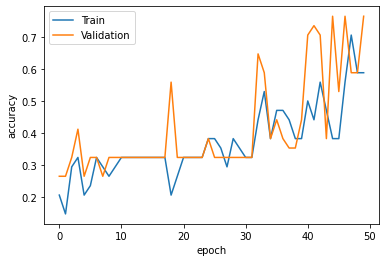

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Object:  sinhdao


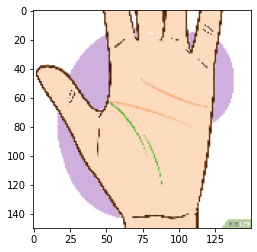

In [27]:
img = load_img('/content/drive/MyDrive/Palm_Reading/Pred/3.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['dinhmenh', 'sinhdao', 'tamdao', 'tridao']
print('Object: ',Label[int(np.argmax(palmreading_model.predict(img),axis=-1))])